### ImageFolder

* In order to augment the dataset, we apply various transformation techniques. These include the crop, resize, rotation, translation, flip and so on. In the pyTorch, those operations are defined in the ‘torchvision.transforms’ package and we can choose some of those transformations when it is needed.

#### Folders Structure.

```python
data
    - train
        - class1
            - img1.png
            - img2.png
            ...
        - class2
            - img1.png
            - img2.png
            ...
        ...
    - validation
        - class1
            - img1.png
            - img2.png
            ...
        - class2
            - img1.png
            - img2.png
            ...
        ....
    - test
      - class1
            - img1.png
            - img2.png
            ...
        - class2
            - img1.png
            - img2.png
            ...
        ....
````


In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
base_dir = "bees_v_ant"

> Image `Transforms`.

In [4]:
image_transforms ={
    "train": transforms.Compose([
        transforms.Resize([224,224]), 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
    ]),
    "validation":transforms.Compose([
        transforms.Resize([224,224]), 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
    ])
}
image_transforms

{'train': Compose(
     Resize(size=[224, 224], interpolation=bilinear)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 ),
 'validation': Compose(
     Resize(size=[224, 224], interpolation=bilinear)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
     Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
 )}

In [6]:
image_datasets = {
    x: datasets.ImageFolder(os.path.join(base_dir, x), image_transforms[x]) for x in ["train", 'validation']
}

In [7]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 20
     Root location: bees_v_ant\train
     StandardTransform
 Transform: Compose(
                Resize(size=[224, 224], interpolation=bilinear)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 'validation': Dataset ImageFolder
     Number of datapoints: 12
     Root location: bees_v_ant\validation
     StandardTransform
 Transform: Compose(
                Resize(size=[224, 224], interpolation=bilinear)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            )}

> Getting `class names` of the datasets.

In [11]:
class_names = image_datasets["train"].classes
class_names

['ant', 'bee']

In [13]:
train = DataLoader(image_datasets['train'],
                   batch_size=5, 
                   shuffle=True,
                   num_workers = 2
                  )
valid = DataLoader(image_datasets['validation'],
                   batch_size=5, 
                   shuffle=False,
                   num_workers = 2
                  )

In [15]:
for x in train:
    pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)

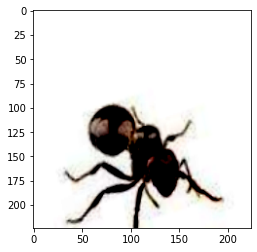

In [29]:
plt.imshow(x[0][0].numpy().transpose(1, 2, 0))
x[1][0]

> `5` images and `5` labels in a `batch`

In [37]:
inputs, classes = next(iter(train))
classes

tensor([1, 1, 0, 0, 0])

> That's how we can use the `ImageFolder` and the `DataLoader`.
[Ref](https://medium.com/jun-devpblog/pytorch-1-transform-imagefolder-dataloader-7f75f0a460c0)